<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<b><center><font size="6">Cours - Econométrie en finance - Séance 10</font></center></b>
    
<g><h7><center> CM - P. Durand  - pierre.durand@u-pec.fr </center></h7></g>

<g><h7><center> TD - A. Birem  - abderraouf.birem@etu.u-pec.fr </center></h7></g>


<b><center><font size="5">M1 - 2023-2024</font></center></b> 



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">


 


<br>
<b>Plan du cours : </b>

- Séance 1 – Introduction générale & Introduction avancée à Python
- Séance 2 – Rappels économétriques et bases de données sous python
- Séance 3 – Modèle de régression simple
- Séance 4 - Modèle de régression multiple
- Séance 5 – Violation des hypothèses (1)
- Séance 6 – Violation des hypothèses (2)
- Séance 7 – Caractéristiques des séries temporelles
- Séance 8 – Stationnarité et conséquences, tests de racine unitaire
- Séance 9 – Modélisation en série temporelles : ARMA-ARCH
- <b>Séance 10 - Modèles VAR et correction d'erreur</b>
- Séance 11 – Introduction aux modèles de classification : logit



<b>Références en Econométrie</b> :

- Pesaran, M. H. (2015). Time series and panel data econometrics. Oxford University Press.

- Bourbonnais, R. (2008), Econométrie, Dunod, 7e édition.

- Mignon, V. (2008), Econométrie : Théorie et applications.

- Lardic, S. & Mignon, V. (2002), Econométrie des séries temporelles macroéconomiques et financières.


<b>Références pour la finance</b>  :

-	Finance de marché (Portait – Poncet)
-	Recent advances in linear models and related areas (Shalabh – Heumann)

<b>Références pour python</b>  :

- Presque tout est gratuit et en open source sur internet
- Liste non exhaustive de livres : <a href="https://python.developpez.com/livres/"> python.developper</a>



<br>
<hr style=" border: .5px solid black;">

<a id='plan'></a>
<br>
<b>Séance 10 : </b>
    
    
    
- [Introduction aux VAR](#p01)
- [1. Vecteur autorégressif](#p1)
    - [1.1 Ecriture générale](#p1.1)
    - [1.2 Définition et propriétés](#p1.2)
    - [1.3 Tests de spécification](#p1.3)
- [2. Estimation et interprétation](#p2)
    - [2.1 Estimation](#p2.1)
    - [2.2 Interprétation](#p2.2)
    - [2.3 Prévision](#p2.3)
- [3. Application](#p3)
- [Introduction aux VECM](#p02)
- [4. Vecteur autorégressif](#p4)
    - [4.1 Ecriture générale](#p4.1)
    - [4.2 Définition et propriétés](#p4.2)
    - [4.3 Tests de spécification](#p4.3)
- [5. Estimation et interprétation](#p5)
    - [5.1 Formalisme](#p5.1)
    - [5.2 Procédure d'estimation](#p5.2)
- [6. Application](#p3)
    



</span>

In [1]:
# packages calculatoires
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.irf import IRAnalysis as IRF
from statsmodels.tsa.vector_ar.var_model import FEVD
from statsmodels.tsa.stattools import grangercausalitytests as granger
from statsmodels.tsa.stattools import adfuller


# packages grahiques
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: 2.5px solid black;">


# Introduction <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font><a id='p0'></a>


- Généralisation des processus AR au cas multivarié. Proposé par <a href="https://www.jstor.org/stable/1912017?seq=1#metadata_info_tab_contents"> Sims (1980)</a>.
- <p style="text-align:justify;"> Repose sur l'hypothèse selon laquelle l'économie peut être représentée par l'évolution d'un vecteur de $N$ variables dépendant linéairement du passé.</p> 
- Représentation générale :


<center>AR(p) : </center> 

$$ x_t = a + \phi_1 x_{t-1} + ... + \phi_p x_{t-p} + \epsilon_t = a + \sum_{k=1}^p \phi_k x_{t-k} + \epsilon_t$$

$$ \Leftrightarrow \Phi(L)x_t = \epsilon_t$$ où $\Phi(L) = 1- \phi_1 L - ... - \phi_p L^p$. La varible dépend de ses valeurs passées.

<br>

<center>VAR(p) - bivarié : </center> 

\begin{cases} x_{1,t} = a_1 + \sum_{k=1}^p b_{1,k} x_{1,t-k} + \sum_{j=1}^p c_{1,j} x_{2,t-j} + \epsilon_{1,t} \\
    x_{2,t} = a_2 + \sum_{k=1}^p b_{2,k} x_{1,t-k} + \sum_{j=1}^p c_{2,j} x_{2,t-j} + \epsilon_{2,t} 
\end{cases}

$$ \Leftrightarrow X_t = A + \sum_{i=1}^p B_i X_{t-i} + \epsilon_t$$

où l'on parle de vecteur autorégressif avec $X_t = \begin{pmatrix} x_{1,t} \\ x_{2,t} \end{pmatrix}$, le vecteur des variables explicatives et expliquées. 

<br>

- On peut étendre ce modèle à $N$ variables. 
- <p style="text-align:justify;"> <b>Attention</b> : le nombre de paramètres croît de manière quadratique avec le nombre de variables et de retards (18 paramètres dans un VAR(4) bivarié, 38 pour un VAR(4) à trois variables, 22 pour un VAR(5) bivarié, etc...).</p>
- On peut également prendre en compte l'autocorrélation des erreurs à l'ordre $q$ (voir les VARMA(p,q)).

<br>

<b>Illustration</b> : on s'intéressera dans ce cours à deux séries générées artificiellement de sortes qu'elles soient stationnaires et interdépendantes.


</span>

In [3]:
# ordre du VAR(4) bivarié
p = 4
# nombre d'observations
n = 1000
# vecteurs de paramètres de chacune des équations
b1 = np.array([[0.1,0.1,0.2,1.5],[0.09,0.1,0.6,3.5]])
b2 = np.array([[0.1,0.2,0.4,0.7],[0.01,0.02,0.5,1.3]])


# initialisation des 4 premières valeurs
x1 = list(np.random.randn(p))
x2 = list(np.random.randn(p))

# boucle avec relation de dépendance entre les deux variables
for t in range(1,n-p+1):
    a = (x1[-p:] @ np.transpose(b1[0,:]) + x2[-p:] @ np.transpose(b1[1,:]) + list(np.random.randn(1))[0] - np.mean(x1))/np.std(x1)
    b = (x1[-p:] @ np.transpose(b2[0,:]) + x2[-p:] @ np.transpose(b2[1,:]) + list(np.random.randn(1))[0] - np.mean(x2))/np.std(x2)
    # On créé artificiellement des chocs exogènes
    if t == n//2 :
        b += -20
    if t == 2*n//3:
        a += 10
    x1.append(a)
    x2.append(b)



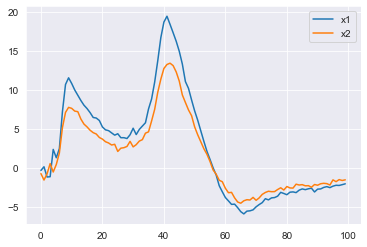

In [4]:
# visualisation
plt.plot(x1[:100])
plt.plot(x2[:100])
plt.legend(["x1","x2"])
plt.show()

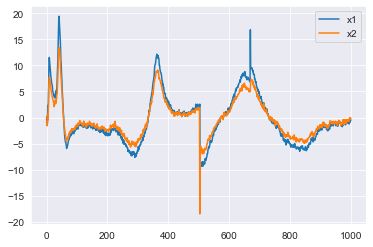

In [5]:
plt.plot(x1)
plt.plot(x2)
plt.legend(["x1","x2"])
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: 2.5px solid black;">


# Vecteur AutoRégressif<font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p1'></a>

<br>

<hr style=" border: .75px solid black;">


## Ecriture générale <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p1.1'></a>

<br>

On écrit un VAR($p$) à $N$ variables comme suit (forme canonique non-centrée) : 


\begin{cases} x_{1,t} = a_1 + \sum_{k_1=1}^p b_{1,k_1}^1 x_{1,t-k_1} + ... + \sum_{k_N=1}^p b_{1,k_N}^N x_{N,t-k_N} + \epsilon_{1,t} \\
... \\
    x_{N,t} = a_N + \sum_{k_1=1}^p b_{N,k_1}^1 x_{1,t-k_1} + ... + \sum_{k_N=1}^p b_{N,k_N}^N x_{N,t-k_N} + \epsilon_{N,t}
\end{cases}

$$ \Leftrightarrow X_t = A + \sum_{i=1}^p B_i X_{t-i} + \epsilon_t$$

où 
$$ X_{t-i} = \begin{pmatrix} x_{1,t-i} \\ ... \\ x_{N,t-i} \end{pmatrix}$$

le vecteur des variables explicatives/expliquées au temps $t-i$, $\forall i \in [\![1;p]\!]$.

$$ A = \begin{pmatrix} a_1 \\ ... \\ a_N \end{pmatrix}$$ 

le vecteur des constantes

$$ \epsilon_t = \begin{pmatrix} \epsilon_{1,t} \\ ... \\ \epsilon_{N,t} \end{pmatrix} $$

le vecteur des erreurs (qui sont des bruits blancs), et

$$ B_i = \begin{pmatrix} b_{1,k_i}^1 & b_{1,k_i}^2 & ... & b_{1,k_i}^N \\ 
    ... & ... &  & ... \\ 
    b_{N,k_i}^1 & b_{N,k_i}^2 & ... & b_{N,k_i}^N \\ 
    \end{pmatrix} $$

la matrice des paramètres pour les variables retardées à l'ordre $i$, $\forall i \in [\![1;p]\!]$.



<hr style=" border: .75px solid black;">


## Définitions et propriétés <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p1.2'></a>

<br>

Deux informations importantes lorsque l'on s'intéresse à un VAR :
- Les séries doivent être stationnaires :
    - si les séries ne sont pas stationnaires, on teste l'existence de cointégration.
    - s'il n'y a pas de relation de cointégration, on peut alors stationnariser les séries pour appliquer le modèle VAR
    
- <p style="text-align:justify;">  Fonction d'autocorrélation partielle : il est possible d'obtenir les fonctions d'autocovariance ou encore d'autocorrélation partielle. On les utilise pour déterminer l'ordre des processus AR. Dans le cadre des VAR, elles sont compelexes à calculer et on aura recours à des critères d'informations pour selectionner un ordre le plus approprié. </p>


<hr style=" border: .75px solid black;">


## Tests de spécification <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p1.3'></a>

<br>

- <p style="text-align:justify;"><b> 2.3.1 - Selection du nombre de retards</b> : critères d'informations (AIC, SIC, HQ) : l'idée est de faire tourner plusieurs modèles avec différents ordre de retard, et de retenir celui qui minimise les critères d'informations (eux-mêmes basés sur des estimateurs de la matrice des résidus). </p>

<p style="text-align:justify;">
<i>Note 1 </i> : les critères d'information SIC et HQIC favorisent un estimateur convergent de $p$ (le "vrai" nombre de retards), AIC conduit vers un estimateur efficace de $p$ (i.e. sans biais et de variance faible) et le FPE (Final Prediction Error) tente de minimiser l'erreur de prévision. </p> 


<p style="text-align:justify;">
<i>Note 2 </i> : On peut également avoir recours au test du rapport de maximum de vraissemblance pour acter le nombre de retards choisis. L'idée est de tester la significativité des paramètres associés au retards d'ordre $p+1$. </p> 


</span>

In [6]:
# on rassemble les deux variables dans une même matrice
X = np.transpose(np.array([x1,x2]))

# on spécifie le modèle
model = VAR(X)

# le modèle est estimé : l'option verbose sert à afficher le nombre de retard selectionné par la machine
res = model.fit(ic='bic', verbose=True)

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC -> 4>
Using 4 based on bic criterion


In [7]:
# ou avec la fonction select_order
model.select_order(maxlags=12).summary()

,AIC,BIC,FPE,HQIC
0,2.587,2.597,13.29,2.591
1,-2.094,-2.064,0.1232,-2.083
2,-2.169,-2.119,0.1143,-2.150
3,-2.244,-2.174,0.1061,-2.217
4,-2.283*,-2.194*,0.1020*,-2.249*
5,-2.278,-2.169,0.1024,-2.237
6,-2.272,-2.143,0.1031,-2.223
7,-2.270,-2.121,0.1033,-2.213
8,-2.265,-2.097,0.1038,-2.201
9,-2.258,-2.070,0.1045,-2.187


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

- <p style="text-align:justify;"><b>2.3.2 - Causalité</b> : on ne s'intéresse ici qu'à la causalité au sens de <a href="https://www.jstor.org/stable/1912791?seq=1#metadata_info_tab_contents"> Granger (1969)</a>. On dit que $X$ cause $Y$ si l'erreur de prévision de $Y$ est moindre lorsque l'on connait conjontement le passé de $Y$ et $X$, que lorsque l'on ne connait que le passé de $Y$. </p> 

<br>

<i>Formellement :</i> $X$ ne cause pas $Y$ en $t$ lorsque 

$$V_\epsilon (Y_t \vert \underline{Y_{t-1}}, \underline{X_{t-1}}) =  V_\epsilon (Y_t \vert \underline{Y_{t-1}})$$

où $V_\epsilon$ est la matrice de variance-covariance de l'erreur de prévision, et la notation $\underline{Y_{t-1}}$ renvoie à l'ensemble de l'information passée avant $t-1$ ($\left\{Y_{t-i},i>0 \right\}$).

<b>Tester la non-causalité</b> : on peut, à partir de l'expression ci-deussus, mener un test de causalité. 

$$\xi = T\times C_{X \rightarrow Y} \sim \chi^2_{r(T-r)p}$$
    

où $T$ est le nombre de périodes, $r$ le nombre de contraintes, $p$ le nombre de retards et $C_{X \rightarrow Y} = \frac{det(V_\epsilon (Y_t \vert \underline{Y_{t-1}}))}{det(V_\epsilon (Y_t \vert \underline{Y_{t-1}}, \underline{X_{t-1}}))} $


<i>Règle de décision</i> :

- $\xi > \chi^2_{r(T-r)p}$, on accepte l'hypothèse nulle d'absence de causalité
- $\xi \leq \chi^2_{r(T-r)p}$, on rejette l'hypothèse nulle d'absence de causalité
    
<p style="text-align:justify;"><b> À quoi ça sert ? </b>  Il peut être intéressant d'étudier la causalité pour justifier le recours à un modèle VAR. En effet, une hypothèse sous-jacente de cette spécification est que les variables s'entre-déterminent. Par conséquent, dans un modèle bivarié VAR(p) par exemple, on pourra regarder la causalité dans les deux sens (de $x_1$ vers $x_2$, et vice versa) pour appuyer la pertinence de ce modèle.</p>  


</span>

In [8]:
# test de causalité de Granger : la deuxième colonne cause-t-elle la première ? 
    # la variable x2 cause-t-elle x1 ?
granger(np.transpose(np.array([x1,x2])), maxlag=4, addconst=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1038.1176, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=1041.2445, p=0.0000  , df=1
likelihood ratio test: chi2=713.3561, p=0.0000  , df=1
parameter F test:         F=1038.1176, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=654.6410, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=1315.8746, p=0.0000  , df=2
likelihood ratio test: chi2=839.2436, p=0.0000  , df=2
parameter F test:         F=654.6410, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=475.4946, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=1436.5699, p=0.0000  , df=3
likelihood ratio test: chi2=889.6867, p=0.0000  , df=3
parameter F test:         F=475.4946, p=0.0000  , df_denom=990, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=356.6061, p=0.0

{1: ({'ssr_ftest': (1038.1175939856525, 1.2889146351542964e-156, 996.0, 1),
   'ssr_chi2test': (1041.2444542085009, 1.947095388628175e-228, 1),
   'lrtest': (713.3560613734669, 3.727173885553835e-157, 1),
   'params_ftest': (1038.117593985652, 1.2889146351544432e-156, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (654.6410171083883, 4.7162243922484446e-182, 993.0, 2),
   'ssr_chi2test': (1315.874592294404, 1.8258405367634824e-286, 2),
   'lrtest': (839.2435838984791, 5.761973679292914e-183, 2),
   'params_ftest': (654.641017108388, 4.7162243922492486e-182, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (475.4945615402865, 2.8140931684006227e-191, 990.0, 3),
   'ssr_chi2test': (1436.5699328959565, 3.417496541897e-311, 3),
   'lrtest': (889.6867050872804, 1.5276807762139216e-192, 3),
   'params_ftest': (475.4945615402867, 2.8140931684003025e-191, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0

In [9]:
    # la variable x2 cause-t-elle x1 ?
granger(np.transpose(np.array([x2,x1])), maxlag=4, addconst=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=374.8374, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=375.9665, p=0.0000  , df=1
likelihood ratio test: chi2=319.1104, p=0.0000  , df=1
parameter F test:         F=374.8374, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=104.2646, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=209.5791, p=0.0000  , df=2
likelihood ratio test: chi2=190.2384, p=0.0000  , df=2
parameter F test:         F=104.2646, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=75.4851 , p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=228.0564, p=0.0000  , df=3
likelihood ratio test: chi2=205.3734, p=0.0000  , df=3
parameter F test:         F=75.4851 , p=0.0000  , df_denom=990, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=56.7771 , p=0.0000  

{1: ({'ssr_ftest': (374.8374496145536, 3.956092640194402e-71, 996.0, 1),
   'ssr_chi2test': (375.966478077248, 9.400144623868402e-84, 1),
   'lrtest': (319.1104217231732, 2.2629318689870255e-71, 1),
   'params_ftest': (374.83744961455284, 3.956092640195302e-71, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (104.26456162946626, 7.892616087173981e-42, 993.0, 2),
   'ssr_chi2test': (209.57911884432497, 3.0936599986418458e-46, 2),
   'lrtest': (190.23839066133587, 4.900702563192529e-42, 2),
   'params_ftest': (104.26456162946634, 7.892616087172972e-42, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (75.48505538388784, 5.67256201210962e-44, 990.0, 3),
   'ssr_chi2test': (228.05636429617027, 3.639509280375395e-49, 3),
   'lrtest': (205.37338953794097, 2.91102992189114e-44, 3),
   'params_ftest': (75.4850553838879, 5.672562012108813e-44, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0.,

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<p style="text-align:justify;">Ici, on voit que $X_2$ cause $X_1$ et inversement. </p>
    
<br>    

- <p style="text-align:justify;"><b>1.3.3 - Exogénéité</b> : concept relativement complexe et pas de manière simple de mener des tests d'exogénéité sous python pour le moment. L'idée est que le bloc de variables $(X_{1,t-1}, X_{1,t-2},...,X_{1,t-p})$ est exogène au bloc $(X_{2,t-1}, X_{2,t-2},...,X_{2,t-p})$ si le fait de rajouter $X_{1,t}$ n'améliore pas significativement la détermination des variables $X_{2,t}$.</p> 

Dans notre cas, nous nous focaliserons sur mener les tests de causalité.

<hr style=" border: .75px solid black;">

<b>Rappels</b> : 
- Pour un VAR : <b>les séries doivent être stationnaires</b> (on doit donc la tester!)
    - Si elles ne le sont pas, on teste la cointégration
    - Si les séries ne sont pas cointégrées, on stationnarise les séries et on passe en VAR
- Pour un VAR, on détermine l'ordre $p$ à partir des critères d'information
- Pour justifier le recours au VAR, on implémente des tests de causalité
    - Au moins une variable doit être causée par une autre
    
<p style="text-align:justify;">$\Rightarrow$ Il ne nous reste plus qu'à voir comment le VAR est estimé, et surtout, comment l'interpréter (en effet, avec parfois 20 à 30 paramètres, l'interprétation classique des coefficients n'est pas triviale).</p> 


<br>


<hr style=" border: 2.5px solid black;">


## Estimation et interprétation <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p2'></a>

<br>

<hr style=" border: .75px solid black;">


### Estimation <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p2.1'></a>


<p style="text-align:justify;">Pas grand chose à dire de façon appliquée ici : si les tests ont été menés correctement, vous utilisez les paramètres appropriés à votre modèle. Pour plus de détails sur la procédure d'estimation, vous pouvez consulter le livre de <a href="https://www.pdfdrive.com/time-series-and-panel-data-econometrics-d176619514.html"> Pesaran (2015)</a> (référence pour beaucoup de ce que l'on peut voir en cours).</p> 

<p style="text-align:justify;"><b>Note</b> : on peut estimer un VAR uniquement sur des séries <b>stationnaires</b>, <b>sans saisonnalité</b>, <b>sans tendance</b>, par MCO ou maximum de vraissemblance.</p>  


</span>

In [10]:
# on rassemble les deux variables dans une même matrice
X = np.transpose(np.array([x1,x2]))

# on spécifie le modèle
model = VAR(X)

# le modèle est estimé : l'option verbose sert à afficher le nombre de retard selectionné par la machine
res = model.fit(ic='bic', verbose=True)
res.summary()

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC -> 4>
Using 4 based on bic criterion


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 25, Nov, 2021
Time:                     08:38:01
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.03453
Nobs:                     996.000    HQIC:                  -2.08946
Log likelihood:          -1751.20    FPE:                   0.119654
AIC:                     -2.12315    Det(Omega_mle):        0.117521
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.008865         0.015303            0.579           0.562
L1.y1         0.668503         0.031807           21.018           0.000
L1.y2         0.772171         0.021182           36.453           0.000
L2.y1         0.061145

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<hr style=" border: .75px solid black;">


### Interprétation<font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p2.2'></a>


<p style="text-align:justify;"> Nous avons principalement deux outils d'analyse des VAR : les fonctions de réponses impulsionnelles (IRF) et l'analyse de la décomposition de variance. </p>

<br>

- <p style="text-align:justify;"><b> Fonctions de réponses impulsionnelles</b> : l'idée ici est de s'intéresser à l'effet d'un choc sur l'erreur d'une des équations (choc exogène) sur la variable endogène de cette équation, mais également sur les autres variables, <i>via</i> la structure dynamique du système VAR. </p>

Nous tenterons ici d'être le plus conçis possible. Pour plus de détails, voir :
- Econométrie des séries temporelles macroéconomiques et financières - S. Lardic et V. Mingon, 2002
- <a href="https://www.pdfdrive.com/time-series-and-panel-data-econometrics-d176619514.html"> Pesaran (2015)</a>
- La modélisation VAR structurel : application à la politique monétaire en France - <a href="https://www.researchgate.net/publication/254392823_La_modelisation_VAR_structurel_application_a_la_politique_monetaire_en_France"> C. Breunneau et O. De Bandt (1999)</a> (article en français).

L'idée des IRFs peut être résumée comme suit : 
- <p style="text-align:justify;">On se sert de la réécriture d'un modèle VAR sous sa forme VMA (Vector Moving Average) <i>via</i> le théorème de Wold. Cela permet d'isoler l'effet des chocs/des erreurs.</p>
- <p style="text-align:justify;">Il est également possible de passer par l'écriture du VAR canonique sous sa forme structurelle : techniquement, une matrice de passage $P$ est appliquée à l'ensemble du modèle. Cette matrice de passage est déduite de la relation entre les erreurs ($\epsilon$) et les chocs passés structurant les variables contemporaines ($\omega$). On utilise donc un estimateur de cette matrice de passage pour obtenir un estimateur de chocs interprétables économiquement.</p>
- <p style="text-align:justify;"><b>Les IRF ne sont pas interprétables</b> lorsque les <b>résidus des différentes équations sont corrélés entre eux</b>. Par conséquent, l'application de $P$ est faite de sorte que les résidus transformés ($\omega = P\epsilon$) soient orthogonalisés (non-corrélés).</p>
- <p style="text-align:justify;">En supposant que les chocs $\omega$ sont non-corrélés entre eux et de variance unitaire, on peut alors recourir à la décomposition de Cholesky : la matrice $P$ est alors la matrice de passage de la digonalisation de la matrice de variance covariance des erreurs, $\Sigma_\epsilon$ (ou matrice dont les vecteurs sont les vecteurs propres de $\Sigma_\epsilon$). Aucune condition économique n'est posée sur l'odre des variables, seulement qu'elles soient <b>ordonnées de la plus exogène vers la plus endogène</b> (cf causalité pour trouver l'ordre). </p>
- <p style="text-align:justify;">Afin d'appliquer une approche par <b>VAR structurel</b>, il est nécessaire de poser des <b><i>a priori</i> économiques</b> sur l'ordre d'influence des variables. C'est selon cet ordonnement que l'on classe les variables dans le système avant d'estimer $P$.</p>

<br>

$\Rightarrow$ Ok.. Pas évident ! Et en pratique, ça donne quoi ? 

<br>

a- Etude des corrélations entre les résidus estimés

</span>

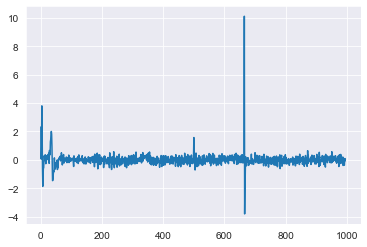

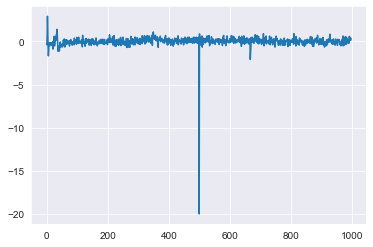

In [11]:
# etude du résidus
res1 = res.resid[:,0]
res2 = res.resid[:,1]

plt.plot(res1)
plt.show()
plt.plot(res2)
plt.show()

In [12]:
# corrélation entre les résidus
np.corrcoef(res1,res2)

array([[1.        , 0.13938833],
       [0.13938833, 1.        ]])

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

On observe une faible corrélation entre les résidus, pas besoin de les orthogonaliser : on peut passer directement à l'analyse des IRF.

<br>

b- Analyse des IRF

</span>

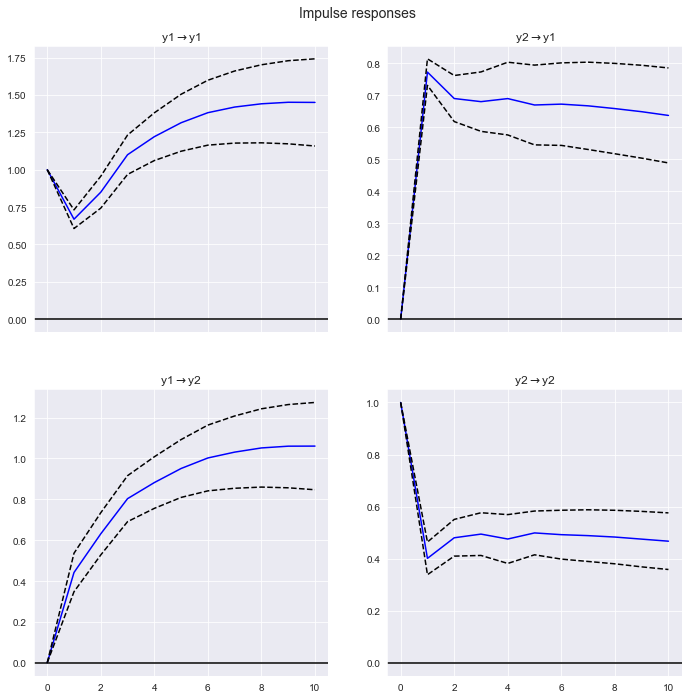

In [16]:
# à court terme
res.irf(periods=10).plot()
plt.show()

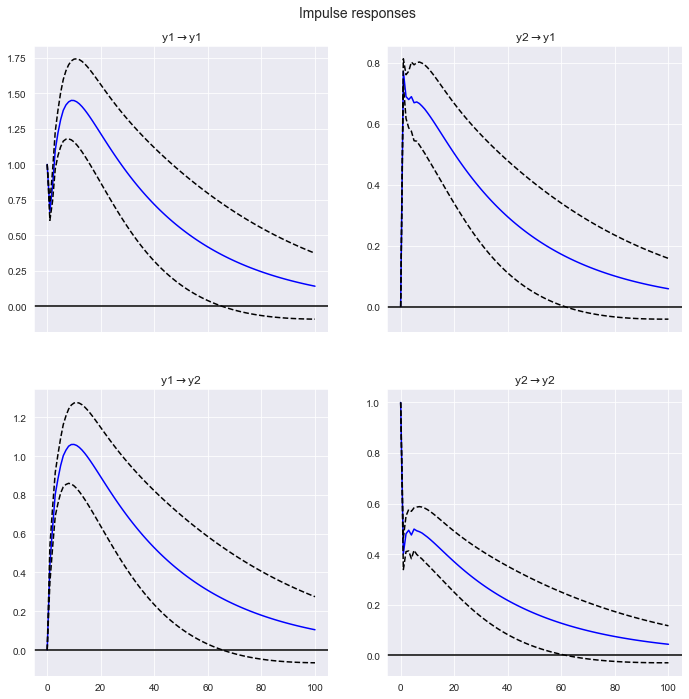

In [17]:
# à long terme
res.irf(periods=100).plot()
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

On interprête les IRF.

<br>

c - Si l'on avait eu de la corrélation entre les résidus 

Il faudrait réestimer le modèle en :
- mettant les variables dans l'ordre, de la plus exogène vers la plus endogène (décomposition de Cholesky)
- mettant les variables de la moins influencée vers la plus dépendante d'un point de vu économique (approche structurelle). <b>Attention</b> : dans ce cas la fonction d'estimation n'est plus la même, voir la documentation de statsmodels et la fonction <a href="https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.svar_model.SVAR.html"> SVAR</a>.

<p style="text-align:justify;"><b>Note</b> : Il est conseillé <b>ici</b> de mener une approche statistique (décomposition de Cholesky) puisque l'on peut se baser sur une approche par les causalités pour mener l'ordonnement. Cela étant, c'est une approche souvent critiquée puiqu'elle ne favorise pas l'interprétation économique des résultats. En pratique, il peut être intéressant de mener les deux approches. Attention, l'approche structurelle demande en plus de mener une étude sur la temporalité de la dynamique du système (court terme, long terme).</p>

</span>

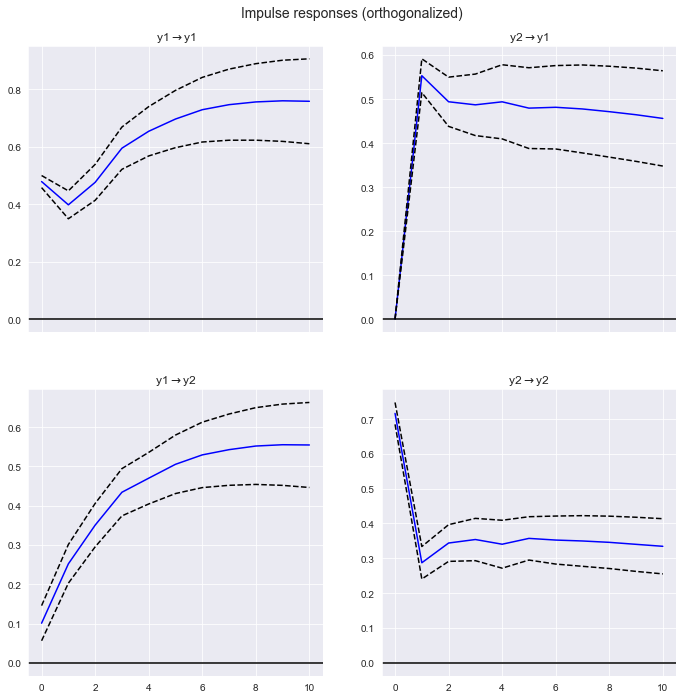

In [14]:
res.irf(periods=10).plot(orth=True)
plt.show()

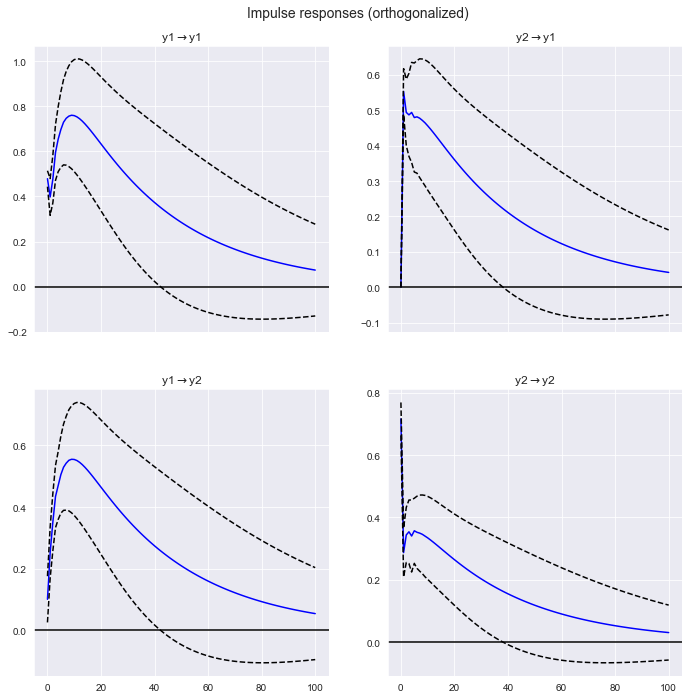

In [18]:
res.irf(periods=100).plot(orth=True, signif=0.001)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<hr style=" border: .75px solid black;">

<br>

- <p style="text-align:justify;"><b>Décomposition de variance</b> : l'analyse des IRF est généralement complétée par une étude de la décomposition de variance des erreurs de prévisions. Ici, l'objectif est de calculer la contribution de chacun des chocs à la variance de l'erreur. On écrit la variance de l'erreur de prévision en fonction de la variance de l'erreur attachée à chacune des variables du système ; puis on rapporte cette quantité à la variance totale.</p>
    
   

</span>

FEVD for y1
           y1        y2
0    1.000000  0.000000
1    0.558971  0.441029
2    0.527735  0.472265
3    0.551733  0.448267
4    0.575286  0.424714
5    0.598783  0.401217
6    0.617861  0.382139
7    0.633227  0.366773
8    0.645801  0.354199
9    0.656203  0.343797

FEVD for y2
           y1        y2
0    0.019429  0.980571
1    0.110065  0.889935
2    0.215873  0.784127
3    0.314578  0.685422
4    0.388237  0.611763
5    0.443132  0.556868
6    0.486149  0.513851
7    0.519369  0.480631
8    0.545796  0.454204
9    0.567073  0.432927




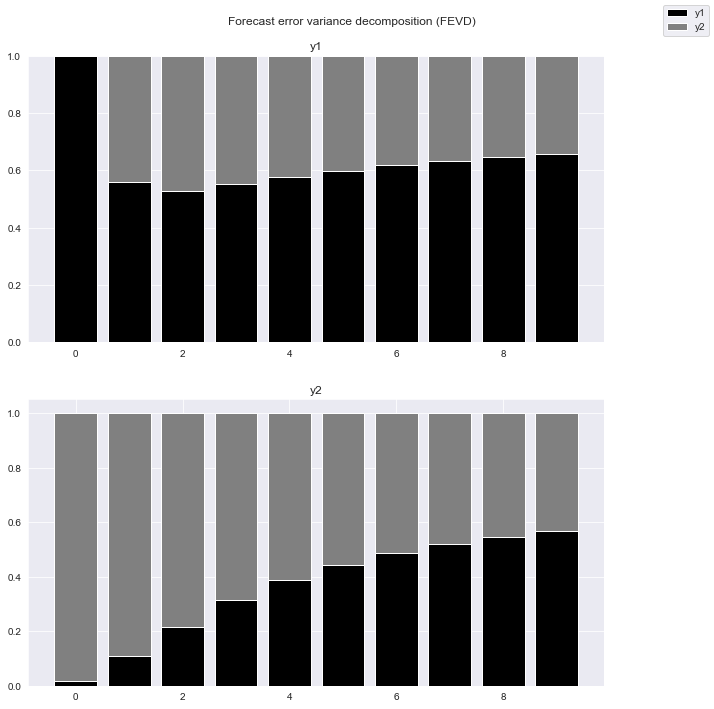

In [13]:
fevd = res.fevd(10)
fevd.summary()
fevd.plot()
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<p style="text-align:justify;">On constate que en moyenne, l'effet de $X_2$ sur $X_1$ est plus important que l'effet de $X_1$ sur $X_2$. En effet, $X_2$ contribue à 50\% dans la variance de l'erreur de $X_1$ ; alors que $X_1$ ne contribue qu'à 30\% à la variance de $X_2$.</p>
    


<hr style=" border: .75px solid black;">

<br>

### Prévision <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p2.3'></a>

<br>

<p style="text-align:justify;">On peut bien entendu toujours effectuer un peu de prévision à partir des résultats obtenus. Généralement, il est très difficile d'obtenir quelque chose de précis. Cela étant, dans certains cas (algo-trading par exemple), il peut être intéressant de se pencher sur la prévision à court terme. </p>

<br>

Illustration :

</span>

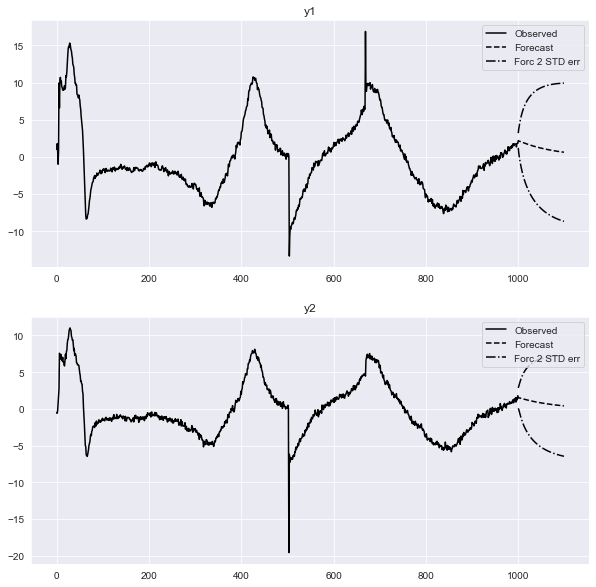

In [19]:
res.plot_forecast(100)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: 2.5px solid black;">


## Application <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p3'></a>

<br>

<p style="text-align:justify;"> Nous allons ici mener une analyse des interractions entre les rendements d'un indice vert global (<a href="https://www.ishares.com/us/products/305296/">Global Green Bond ETF</a>) et ceux du SP500. L'idée ici est de s'intéresser à une intuition mise en évidence par la littérature : il existe un lien asymétrique entre les indices boursiers verts et les indices plus classiques. Ce lien est plus fort en direction de l'indice vert que l'inverse. </p> 


<br>

1) Importation des données et calcul des rendements


</span>

In [3]:
# Chargement des packages utiles au scrapping
import requests as rq
from bs4 import BeautifulSoup as bs
import json
import datetime as dt
from io import StringIO
import matplotlib.pyplot as plt

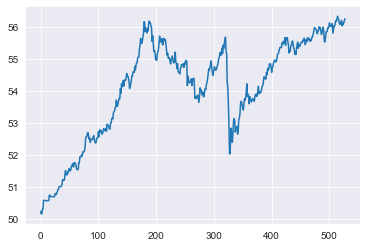

In [4]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

url_base = "https://query1.finance.yahoo.com"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00
symbol = "BGRN"
period1 = int(dt.datetime(2018,11,27).timestamp())
period2 = int(dt.datetime(2021,1,1).timestamp())
interval = "1d"

url_suite = "/v7/finance/download/%s?period1=%s&period2=%s&interval=%s" % (symbol, period1, period2, interval)

full_url = url_base + url_suite

resp = rq.get(full_url, headers=headers).text

str_io = StringIO(resp)

df_green = pd.read_csv(str_io, sep=",")

plt.plot(df_green["Close"])
plt.show()

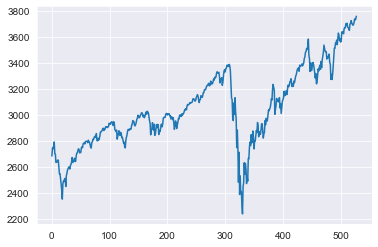

In [5]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

url_base = "https://query1.finance.yahoo.com"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00
symbol = "^GSPC"
period1 = int(dt.datetime(2018,11,28).timestamp())
period2 = int(dt.datetime(2021,1,1).timestamp())
interval = "1d"

url_suite = "/v7/finance/download/%s?period1=%s&period2=%s&interval=%s" % (symbol, period1, period2, interval)

full_url = url_base + url_suite


resp = rq.get(full_url, headers=headers).text

str_io = StringIO(resp)

df_sp = pd.read_csv(str_io, sep=",")

plt.plot(df_sp["Close"])
plt.show()

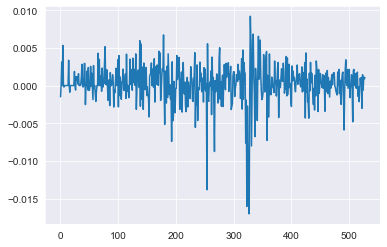

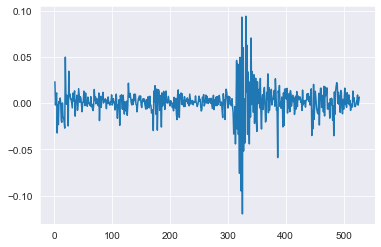

In [6]:
# calcul des rendements

df_green["rdt_green"] = df_green[["Close"]].pct_change()
df_green["rdt_green"].plot()
plt.show()

df_sp["rdt_sp"] =  df_sp[["Close"]].pct_change()
df_sp["rdt_sp"].plot()
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

2) Stationnarité des rendements



</span>

In [7]:
# pour économiser du temps, on regarde directement le modèle sans constante ni tendance
    # à ne pas faire pour le projet perso : il faut tester tous les modèles
adf_rbgrn = adfuller(df_green["rdt_green"].dropna(), regression='nc', autolag='AIC', regresults=True)
adf_rbgrn

(-6.7334612965267,
 2.378378747098056e-10,
 {'1%': -2.570078134378893,
  '5%': -1.9415318992077868,
  '10%': -1.6163162371816224},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1ecc083da30>)

In [8]:
adf_rbgrn = adfuller(df_sp["rdt_sp"].dropna(), regression='nc', autolag='AIC', regresults=True)
adf_rbgrn

(-6.140485062673974,
 4.70560335450357e-09,
 {'1%': -2.570069733456567,
  '5%': -1.941530848988306,
  '10%': -1.6163171908392429},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1ecba6234f0>)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

L'hypothèse nulle de racine unitaire est rejetée au seuil critique de 1%. La série de rendement des actifs verts est donc $I(0)$.

Les séries étant stationnaires, nous n'avons pas nécessité de tester la relation de cointégration.

<br>
    
3) Nombre de retards et causalité

3.1 - Nombre de retards

</span>

In [9]:
X = pd.DataFrame(data={"rdt_green":df_green.dropna().rdt_green.values,
                      "rdt_sp":df_sp.dropna().rdt_sp.values})

In [10]:
# on spécifie le modèle
model = VAR(X)

# le modèle est estimé : l'option verbose sert à afficher le nombre de retard selectionné par la machine
res = model.fit(ic='bic', verbose=True)

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 10, BIC -> 2, FPE -> 10, HQIC -> 9>
Using 2 based on bic criterion


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Le retard le plus récurrent est 10. Néanmoins, nous retiendrons dans un premier temps 2 pour des raisons de simplicité. 

3.2 - Causalité

a - Causalité de rdt_green vers rdt_sp (causalité de la deuxième colonne sur la première)

In [14]:
granger(X[["rdt_sp","rdt_green"]], maxlag=10, addconst=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0357  , p=0.8501  , df_denom=523, df_num=1
ssr based chi2 test:   chi2=0.0359  , p=0.8496  , df=1
likelihood ratio test: chi2=0.0359  , p=0.8496  , df=1
parameter F test:         F=0.0357  , p=0.8501  , df_denom=523, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3780  , p=0.0130  , df_denom=520, df_num=2
ssr based chi2 test:   chi2=8.8402  , p=0.0120  , df=2
likelihood ratio test: chi2=8.7666  , p=0.0125  , df=2
parameter F test:         F=4.3780  , p=0.0130  , df_denom=520, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7355  , p=0.0430  , df_denom=517, df_num=3
ssr based chi2 test:   chi2=8.3176  , p=0.0399  , df=3
likelihood ratio test: chi2=8.2523  , p=0.0411  , df=3
parameter F test:         F=2.7355  , p=0.0430  , df_denom=517, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.8494  , p=0.0234  

{1: ({'ssr_ftest': (0.03573954696201248, 0.8501277051081619, 523.0, 1),
   'ssr_chi2test': (0.03594455392355366, 0.8496300398803749, 1),
   'lrtest': (0.03594332583179494, 0.8496325780632865, 1),
   'params_ftest': (0.035739546962016366, 0.8501277051081619, 523.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.377985037004777, 0.013016538903563328, 520.0, 2),
   'ssr_chi2test': (8.840162093951953, 0.012033256986111936, 2),
   'lrtest': (8.766560061726523, 0.012484342362294315, 2),
   'params_ftest': (4.377985037004794, 0.013016538903563328, 520.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.735487677168442, 0.04301378657465799, 517.0, 3),
   'ssr_chi2test': (8.317575683769421, 0.03988468508581084, 3),
   'lrtest': (8.252252615003272, 0.041076170594139524, 3),
   'params_ftest': (2.735487677168427, 0.04301378657465799, 517.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
On observe une causalité faiblement significative à partir du 2ème retard (faiblement puisque les p-valeurs des tests de Granger varient entre 1 et 5%).

Qu'en est-il de la causalité inverse ? 

b - Causalité de rdt_sp vers rdt_green


</span>

In [15]:
granger(X[["rdt_green","rdt_sp"]], maxlag=10, addconst=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9274  , p=0.0877  , df_denom=523, df_num=1
ssr based chi2 test:   chi2=2.9442  , p=0.0862  , df=1
likelihood ratio test: chi2=2.9360  , p=0.0866  , df=1
parameter F test:         F=2.9274  , p=0.0877  , df_denom=523, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4153  , p=0.0125  , df_denom=520, df_num=2
ssr based chi2 test:   chi2=8.9154  , p=0.0116  , df=2
likelihood ratio test: chi2=8.8406  , p=0.0120  , df=2
parameter F test:         F=4.4153  , p=0.0125  , df_denom=520, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.7140  , p=0.0002  , df_denom=517, df_num=3
ssr based chi2 test:   chi2=20.4148 , p=0.0001  , df=3
likelihood ratio test: chi2=20.0271 , p=0.0002  , df=3
parameter F test:         F=6.7140  , p=0.0002  , df_denom=517, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.3997  , p=0.0003  

{1: ({'ssr_ftest': (2.9273700086533325, 0.08768222070192994, 523.0, 1),
   'ssr_chi2test': (2.9441618060261048, 0.08618840198307735, 1),
   'lrtest': (2.9359527957085447, 0.08662753718953604, 1),
   'params_ftest': (2.92737000865345, 0.08768222070192316, 523.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.415268386825688, 0.012547951230285332, 520.0, 2),
   'ssr_chi2test': (8.915445781090332, 0.011588722053738908, 2),
   'lrtest': (8.840591863614463, 0.012030671499515899, 2),
   'params_ftest': (4.4152683868256855, 0.012547951230285332, 520.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (6.71401430390191, 0.00018865083209573154, 517.0, 3),
   'ssr_chi2test': (20.414759160026694, 0.0001392506125484497, 3),
   'lrtest': (20.027121208706376, 0.00016755973174139804, 3),
   'params_ftest': (6.714014303901901, 0.00018865083209573154, 517.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
    

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
On observe un causalité significative à 10% dés le premier retard. Par ailleurs, la significativité des tests pour les retards suivant est plus arffirmée. On gardera en tête que la variable SP est plus exogène que BGRN.
    
<br>   
    
5) Estimation du VAR

On estime le var avec le SP500 en première variable puisque selon la théorie économique et les tests de causalité, c'est la variable la plus exogène. 


</span>

In [16]:
# on spécifie le modèle
model = VAR(X)

# le modèle est estimé : l'option verbose sert à afficher le nombre de retard selectionné par la machine
res = model.fit(ic='bic', verbose=True)
res.summary()

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 10, BIC -> 2, FPE -> 10, HQIC -> 9>
Using 2 based on bic criterion


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 24, Nov, 2021
Time:                     14:28:25
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -20.1393
Nobs:                     525.000    HQIC:                  -20.1887
Log likelihood:           3827.99    FPE:                1.65332e-09
AIC:                     -20.2205    Det(Omega_mle):     1.62227e-09
--------------------------------------------------------------------
Results for equation rdt_green
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000165         0.000115            1.427           0.154
L1.rdt_green         0.042540         0.043402            0.980           0.327
L1.rdt_sp            0.017538         0.007319            2.

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

6) Structure des résidus et IRF

6.1 - Les résidus sont-ils corrélés entre eux ? 

</span>

In [20]:
res.resid.corr()

,rdt_green,rdt_sp
rdt_green,1.000000,-0.003494
rdt_sp,-0.003494,1.000000


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Ici, on constate que la corrélation entre les résidus est très proche de 0. Par conséquent, on peut passer à l'interprétation des IRF sans besoin d'orthogonaliser les inoovations. 

6.2 - IRF

</span>

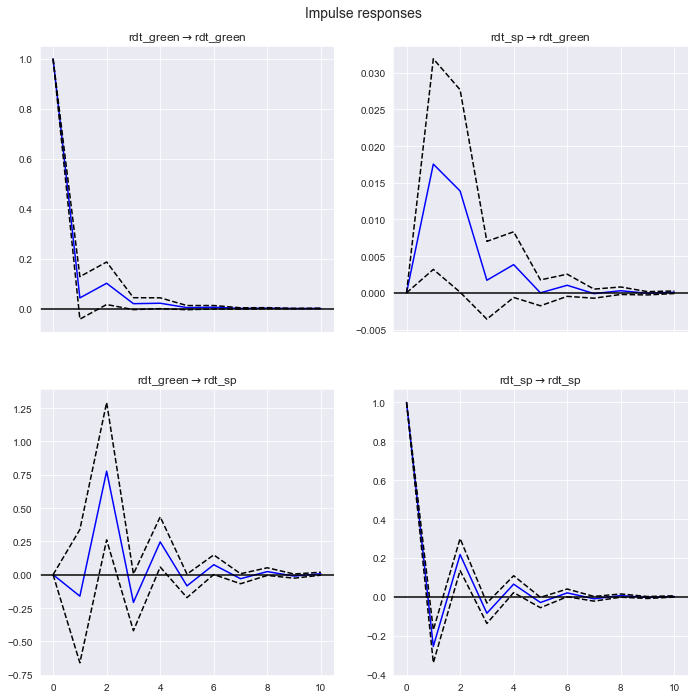

In [21]:
# à court terme
res.irf(periods=10).plot()
plt.show()

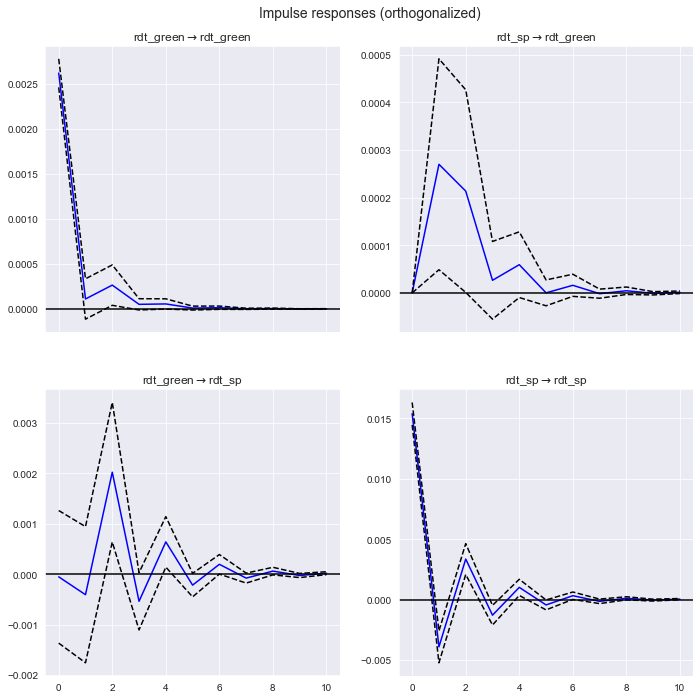

In [22]:
res.irf(periods=10).plot(orth=True)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

7) Analyse de la décomposition de variance de l'erreur

</span>

FEVD for rdt_green
     rdt_green    rdt_sp
0     1.000000  0.000000
1     0.989517  0.010483
2     0.983230  0.016770
3     0.983139  0.016861
4     0.982660  0.017340
5     0.982660  0.017340
6     0.982626  0.017374
7     0.982625  0.017375
8     0.982623  0.017377
9     0.982623  0.017377

FEVD for rdt_sp
     rdt_green    rdt_sp
0     0.000012  0.999988
1     0.000672  0.999328
2     0.015923  0.984077
3     0.016886  0.983114
4     0.018310  0.981690
5     0.018469  0.981531
6     0.018599  0.981401
7     0.018620  0.981380
8     0.018633  0.981367
9     0.018635  0.981365




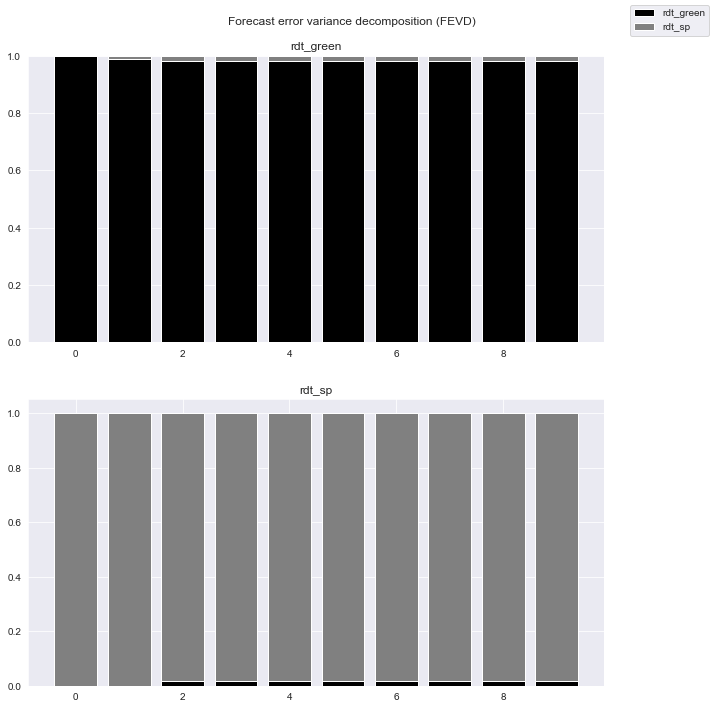

In [23]:
fevd = res.fevd(10)
fevd.summary()
fevd.plot()
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

On constate finalement que les deux indices sont ne sont effectivement pas directement ni fortement interconnectés. Ce résultats (ou cette absence de résultat) peut provenir du choix de l'indice boursier vert. Avec un indice plus centré sur les US (et donc plus proche du SP500), nous pourrions peut être mieux capter les effets de vases communiquant pouvant s'opérer sur le marché entre la sphère financière "classique" et un indice plus représentatif d'une économie "verte".

</span>

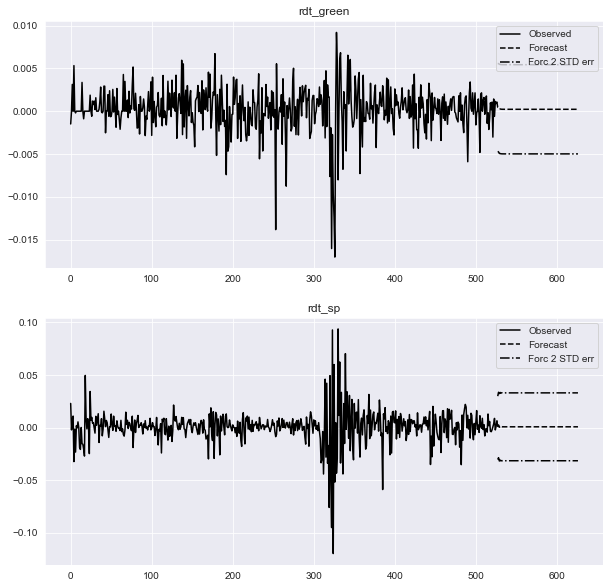

In [28]:
res.plot_forecast(100)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Prévisions au jour le jour : 
- boucle sur l'échantillon réduit de i-périodes (jusqu'à une date t)
- pour chaque sous échantillon, on stock la valeur prédite pour la date t+1
- puis on recommence, en prenant en compte l'échantillon réduite jusqu'à la date t+1
- procédure jusqu'à ce que l'on est fait toute la fin de l'échantillon
- finalement, on compare les prédictions aux vraies valeurs observées

</span>

In [72]:
# prévision day by day
forecast_green = []
forecast_sp = []

for i in range(101,0,-1) :
    mX = X.iloc[:-i]
    results = VAR(mX).fit(ic='bic')
    
    forecast_green.append(results.forecast(mX.values[:], 1)[0][0])
    forecast_sp.append(results.forecast(mX.values[:], 1)[0][1])    

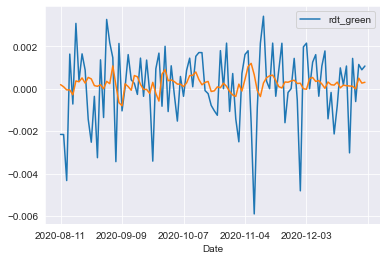

In [75]:
# plot des prévisions dbd
df_green.iloc[-100:][["Date","rdt_green"]].plot(x="Date",y="rdt_green")
plt.plot(forecast_green[1:])
plt.show()

In [80]:
# racine de l'erreur de prévision au carré, moyenne
rmse = [i**2 for i in df_green.iloc[-100:].rdt_green - forecast_green[1:]]
np.sqrt(np.mean(rmse))

0.0017780169409474715

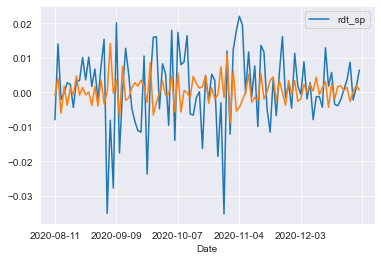

In [76]:
# pour le sp500
df_sp.iloc[-100:][["Date","rdt_sp"]].plot(x="Date",y="rdt_sp")
plt.plot(forecast_sp[1:])
plt.show()

In [81]:
# rmse pour le sp500
rmse = [i**2 for i in df_sp.iloc[-100:].rdt_sp - forecast_sp[1:]]
np.sqrt(np.mean(rmse))

0.011221800386868186

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: 2.5px solid black;">


# Introduction à la cointégration <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font><a id='p02'></a>


Un chien et un ivrogne marchent dans la rue... qui tombe le premier ? 



- Soient $Y_t$ et $X_t$, deux séries non stationnaires (intégrées d'ordre 1 par exemple) et indépendantes, alors la régression $Y_t = \alpha + \beta X_t + \epsilon_t$ est dite fallacieuse (expérience de <a href="https://www.sciencedirect.com/science/article/abs/pii/0304407674900347"> Granger et Newbold (1974)</a>). 
- $X_t$ apparait comme une variable explicative de $Y_t$ (impossible car les deux sont indépendantes) : dans une régression fallacieuse, les tests d'inférence statistique (de significativité : Student et Fisher par exemple), sont faussés. 
- La régression entre deux séries non stationnaires entraine l'invalidité de certaines lois asymptotiques
- Modélisations VAR et ARMA ne fonctionnent pas sur les séries non-stationnaires
- Stationnarisation <i>via</i> la différence : 
    - masque les propriétés de long terme des séries
    - lorsque deux séries non-stationnaires sont liées par une relation de long terme, on va parler de <b>cointégration</b> que l'on modélise au travers de modèles à <b>correction d'erreur</b>. Ce type de relation n'est pas pris en compte par les modèles classiques.

<br>

<b>Illustration</b>

<p style="text-align:justify;">  
Nous reprenons l'exemple de Granger et Newbold pour montrer l'invalidité des tests statistiques usuels dans le cas des MCO appliqués à deux séries non-stationnaires. Nous définissons deux séries inépendantes et non-stationnaires suivants une marche aléatoire : 
</p>

$$ X_t = X_{t-1} + u_t $$

$$ Y_t = Y_{t-1} + v_t $$

<p style="text-align:justify;">  
On estime $Y_t = \alpha + \beta X_t + \epsilon_t$ et on regarde la significativité de $\beta$ (sachant qu'il ne devrait pas l'être). Nous répétons la procédure un certain nombre de fois (simulations de Monte-Carlo) pour s'assurer que nos résultats sont robustes "asymptotiquement". 
</p>

</span>

In [20]:
# packages calculatoires
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.vector_ar.vecm import select_order
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

# packages grahiques
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# fonction marche aléatoire (X(t) = X(t-1) + u(t)) : n observations
def random_walk(n):
    xt = np.random.randint(20,size=1)[0]
    l_ar = []
    for i in range(n):
        xt += np.random.randn(1)[0]
        l_ar.append(xt)
    return np.array(l_ar)

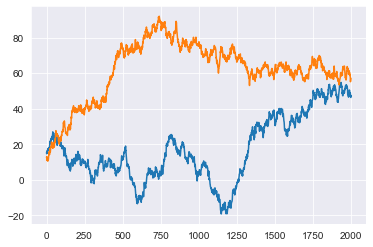

In [30]:
# générer deux variables suivant une marche aléatoire
n = 2000
X = random_walk(n)
Y = random_walk(n)

# évolutions 
sns.set_style("darkgrid")
plt.plot(X)
plt.plot(Y)
plt.show()

In [85]:
mod = sm.OLS(Y, X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.585
Model:                            OLS   Adj. R-squared (uncentered):              0.585
Method:                 Least Squares   F-statistic:                              2821.
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                        0.00
Time:                        15:38:09   Log-Likelihood:                         -7553.6
No. Observations:                2000   AIC:                                  1.511e+04
Df Residuals:                    1999   BIC:                                  1.511e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

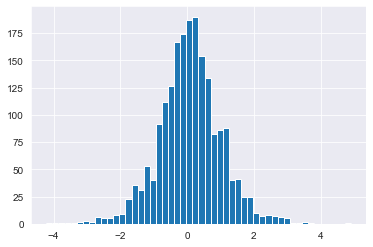

In [86]:
# Simulation de Monte-Carlo
    # A ne pas reproduire chez soi (risque de clacul un peu long en fonction de n et mc)
mc = 2000
l_betas, l_pval = [], []
for i in range(mc):
    n = 2000
    X = random_walk(n)
    Y = random_walk(n)
    
    mod = sm.OLS(Y, X)
    res = mod.fit()

    l_betas.append(res.params[0])
    l_pval.append(res.pvalues[0])
        
plt.hist(l_betas, bins=50)
plt.show()

In [87]:
# moyenne des p-val (manipuler avec précaution)
sum(l_pval)/len(l_pval)

0.011421865402721587

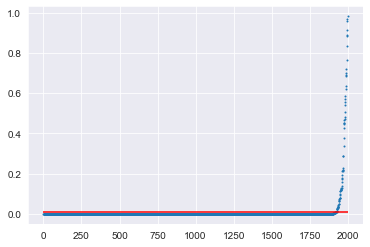

In [88]:
# répartition des p-val (conclusion imparable)
plt.scatter([i for i in range(len(l_pval))], sorted(l_pval),s=1)
plt.hlines(0.01,0,2000, colors="red")
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: 2.5px solid black;">


## Cointégration <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p4'></a>

<br>

<hr style=" border: .75px solid black;">


### Définition <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p4.1'></a>

<br>

<b>Formellement</b>

<br>

Soient $X_t$ et $Y_t$, deux séries $I(d)$, intégrées à l'ordre $d$, alors généralement : 

$$ z_t = X_t - aY_t $$ 

<p style="text-align:justify;">  
est aussi $I(d)$. Cependant, $z_t$ peut aussi est $I(d-b)$ (avec $b$ un entier tel que $b<d$) et on dit alors que $X$ et $Y$ sont sointégrées d'ordre $C(d,b)$. Nous allons particulièrement nous intéresser au cas où $b=d=1$ (cointégration à l'ordre $C(1,1)$), c'est à dire que $z_t$, la combinaison linéaire des deux séries non-stationnaires, est stationnaire, soit $I(0)$. 
</p>

Note : $a$ est le paramètre de cointégration.


<br>

<b>En français</b>

<br>

<p style="text-align:justify;">  
À court terme, les deux variables peuvent diverger, mais elles gardent une relation commune de long terme : elles sont linéaires autour d'une tendance.
</p>    

<i>Exemple</i> : on peut penser au revenu et à la consommation. 


</span>

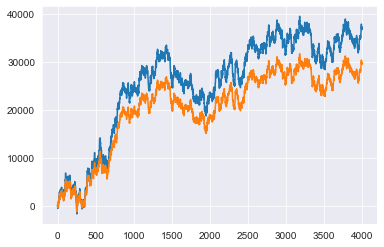

In [89]:
# générer deux variables suivant un trend et cointégrées

def trend_serie(n):
    xt = np.random.randint(20,size=1)[0]
    t = np.arange(n)
    p = n/10
    l_ar = []
    for i,j in zip(range(n),t):
        xt += p*np.random.randn(1)[0] + j/p
        l_ar.append(xt)
    return np.array(l_ar)

n=4000
X = trend_serie(n)
Y = 100 + 0.8*X + np.random.randn(n) 

# évolutions 
sns.set_style("darkgrid")
plt.plot(X)
plt.plot(Y)
plt.show()

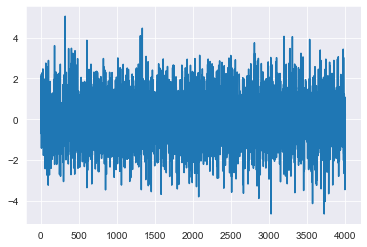

In [90]:
# la combinaison linaire de X et Y (et 1/a pour prendre en compte le paramètre de cointégration)
Z = X - 10/8*(Y-100)
plt.plot(Z)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .75px solid black;">


### Tester la cointégration <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p4.1'></a>

<br>

<b>Intuition</b>

<br>

<p style="text-align:justify;">  
Maintenant que nous avons compris à quoi fait référence la cointégration, il est important de pouvoir la tester. L'idée ici vient du processus $z_t$ que nous avons défini plus haut :
</p>

$$ z_t = X_t - aY_t $$ 


<p style="text-align:justify;">  
où $z_t \sim I(0)$. Par conséquent, pour voir si $X_t$ et $Y_t$ sont cointégrées, nous allons simplement procéder à des tests de racine unitaire sur $z_t$ (<i>i.e.</i> tester la stationnarité de $z_t$).
</p>

<br>

<b>Concrètement</b>

Il existe plusieurs tests pour étudier la cointégration de séries. En voici quelques-uns que nous ne détaillons pas ici : 
- <i>Cointegration regression Durbin Watson</i> (CRDW), basé sur la statistique de DW de la relation de long terme
- Les tests basés sur la spécification VAR (<i>Vector Autoregressive</i>). 

Nous ne détaillons ici que les tests basés sur les tests de racine unitaire de Dickey-Fuller pour deux raisons :
- <a href="https://www.jstor.org/stable/1913236?seq=1#metadata_info_tab_contents"> Engle et Granger (1987)</a> recommandent ces tests (pour leur puissance et statbilité).
- Ils font appels à des tests que vous connaissez déjà (DF et ADF).

L'idée est assez simple : 
- 1. Estimer la <b>relation de long terme</b> par les MCO :

$$Y_t = \alpha + \beta X_t + z_t $$

<p style="text-align:justify;">  
les estimateurs de $\alpha$ et $\beta$ convergent vers leur vraies valeurs lorsque les séries sont cointégrées. Exemple avec $X$ et $Y$ issues du dernier exemple (nous avions défini $\beta = 0.8$ et $\alpha = 100$) :
</p>






</span>

In [91]:
mod = sm.OLS(Y, sm.add_constant(X))
res = mod.fit()
print("Le coefficient beta estimé est :",res.params[1])
print("La constante est estimée à :",res.params[0])

Le coefficient beta estimé est : 0.8000010113644113
La constante est estimée à : 99.97505421233592


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>



- 2. Puis on récupère la série de résidu estimé $\hat{z}_t$ (on a bien $\hat{z}_t = Y_t - \hat{\alpha} - \hat{\beta}X_t$)
- 3. Enfin, on teste la stationnarité de cette série de résidus. Pour le test ADF, on estimera le modèle suivant :

$$\Delta \hat{z}_t = \phi \hat{z}_{t-1} + \sum_{i=1}^p \phi_i \Delta \hat{z}_{t-i} + u_t$$


<p style="text-align:justify;">  
<b> Note </b> : nous cherchons à tester la stationnarité de $z_t$ sans constante ni tendance. On peut donc passer directement à la dernière étape du test ADF.
</p>


<p style="text-align:justify;">  
<b> Important </b> : on s'intéresse au résidu estimé, par conséquent, il convient de se référer aux valeurs critiques tabulées par <a href="https://www.researchgate.net/publication/4804830_Critical_Values_for_Cointegration_Tests"> McKinnon (1991)</a>, dans lesquelles $N$ est le nombre de variables considérées et $T$ le nombre d'observations.
</p>


<b> Règle de décision </b> :
- si $t_{\hat{\phi}} <$ valeur critique $\Rightarrow $ on rejette $H_0$ : $X_t$ et $Y_t$ sont cointégrées ($z_t$ est stationnaire)
- si $t_{\hat{\phi}} >$ valeur critique $\Rightarrow $ on accepte $H_0$ : $X_t$ et $Y_t$ ne sont pas cointégrées ($z_t$ est non stationnaire)

En reprenant nos deux séries $X$ et $Y$, cela donne :

</span>

In [92]:
# 1. estimation de la relation de long terme
mod = sm.OLS(Y, sm.add_constant(X))
result = mod.fit()

# 2. récupération de la série de résidu z(t)
Z = result.resid 

In [93]:
# 3. test adf sur z(t) sans constant ni tendance
adf = adfuller(Z, regression='nc', autolag='AIC', regresults=True)
adf

(-63.64271336152865,
 0.0,
 {'1%': -2.566299316573329,
  '5%': -1.9410673767211681,
  '10%': -1.6167537527090834},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1ecc53a19d0>)

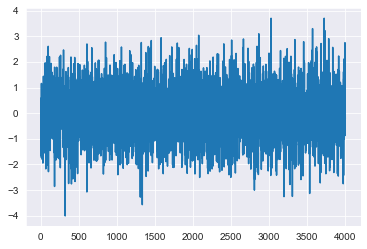

In [94]:
plt.plot(Z)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<p style="text-align:justify;">  
Ici nous avons $N=2$ et $T=2000$, par conséquent, nous prenons la valeur critique tabulée par McKinnon au seuil de $5\%$ égale à $-3.34$. 
</p>

<p style="text-align:justify;">  
Or, $t_{\hat{\phi}} = -63.03$ donc $t_{\hat{\phi}} < -3.34$ et nous pouvons donc rejeter l'hypothèse nulle de racine unitaire dans la série de résidu estimé $z_t$. Autrement dit, $z_t$ est stationnaire/intégrée d'ordre 0 et donc les variables $X$ et $Y$ sont $C(1,1)$ (cointégrées aux ordres $(1,1)$). 
</p>


<br>


<hr style=" border: 2.5px solid black;">




## Estimation avec cointégration : modèles à correction d'erreur <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p5'></a>

<br>

<hr style=" border: .75px solid black;">

<p style="text-align:justify;">  
Maintenant que nous avons vu comment tester l'existence d'une relation de cointégration entre deux variables, nous allons présenter maintenant comme modéliser cette relation à l'aide de modèles à correction d'erreur. Nous allons voir comment s'écrit un modèle à correction d'erreur de façon formelle, puis nous verrons en pratique comment l'estimer.  
</p>

### Formalisme <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p5.1'></a>

On considère deux variables $X_t$ et $Y_t$, telles qu'elles sont $C(1,1)$. Le modèle à correction d'erreur s'écrit :  

\begin{cases} \Delta X_t = \gamma_1 z_{t-1} + \sum_i \beta_i \Delta X_{t-i} + \sum_j \delta_j \Delta Y_{t-i} + d_1(L)\epsilon_{X_t} \\ \Delta Y_t = \gamma_2 z_{t-1} + \sum_i \beta'_i \Delta X_{t-i} + \sum_j \delta'_j \Delta Y_{t-i} + d_2(L)\epsilon_{Y_t} \end{cases}

<p style="text-align:justify;">  
où $\epsilon_{X_t}$ et $\epsilon_{Y_t}$ sont des bruits blancs, $z_t = X_t - a Y_t$ (le résidu de la relation de long terme), $d_1$ et $d_2$ sont des polynômes finis en $L$, et $L$ est l'opérateur retard. 
</p>

<p style="text-align:justify;">  
<b> Note </b> : la différence avec un modèle VAR est la présence de $z_{t-1}$. Les coefficients $\gamma$ représentent la force de rappel vers la relation de long terme (elle-même donnée par la relation de cointégration). 
</p>

<p style="text-align:justify;">  
On combine donc des variables en niveau, caractérisant la relation de long terme, et des variables en différence première, rendant compte des fluctuations à court terme. 
</p>


<br>

<hr style=" border: .75px solid black;">


### Procédure d'estimation  <font color='blue' size=".5"><i>


La procédure pour estimer un modèle à correction d'erreur est assez logique : 
- 0. Préambule : vérifier que les séries sont bien, non-stationnaires
- 1. Estimation de la relation de long terme et test de cointégration
- 2. Si les séries sont cointégrées, on procède à l'estimation du modèle par les MCO (avec la série de résidu estimé pour la série $z_t$, donc $\hat{z}_t$)

<p style="text-align:justify;">  
Dans ce cas, <a href="https://www.jstor.org/stable/1913236?seq=1#metadata_info_tab_contents"> Engle et Granger (1987)</a> montrent que les estimateurs $\hat{\gamma}$, $\hat{a}_i$ et $\hat{b}_i$ sont convergents et équivalents à ceux du maximum de vraissemblance ; et les écarts-types des coefficients estimés sont des estimateurs des vrais ecarts-types (donc l'inférence statistique est possible). 
</p>

<br>

<p style="text-align:justify;">  
<b>Exemple</b> : dans notre cas, nous savons que $X$ et $Y$ sont $I(1)$ par construction (normalement il faudrait tester la présence de racine unitaire) et nous avons vu que les séries sont cointégrées. Il nous reste donc à estimer le modèle à correction d'erreur.
</p>

</span>

In [95]:
# selection du bon nombre de lag
    # on réuni l'ensemble des variables au sien d'un même array
var = np.transpose(np.array([X,Y]))

    # estimation de n modèles
lag_order = select_order(data=var, maxlags=10, deterministic="nc")
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,11.91,11.92*,1.494e+05,11.92
1,11.91*,11.93,1.490e+05*,11.92*
2,11.91,11.94,1.493e+05,11.92
3,11.92,11.94,1.495e+05,11.93
4,11.92,11.95,1.498e+05,11.93
5,11.92,11.96,1.500e+05,11.93
6,11.92,11.97,1.502e+05,11.94
7,11.92,11.97,1.502e+05,11.94
8,11.92,11.98,1.505e+05,11.94
9,11.92,11.99,1.505e+05,11.95


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

On selectionne donc un nombre de retard égale à 1. 

</span>

In [96]:
# s'arrurer de l'ordre d'intégration (même si dans notre cas, nous le connaissons, par construction)
rank_test = select_coint_rank(var, det_order=-1,  k_ar_diff=1, signif=0.05)
rank_test.rank

0

In [97]:
# la fonction vecm du packages statsmodels reestime directement la relation de long terme
model_vecm = VECM(var, exog=None, coint_rank=1, k_ar_diff=2, deterministic='nc')
res_vecm = model_vecm.fit()
res_vecm.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.y1,-10.8885,4.019,-2.709,0.007,-18.765,-3.012
L1.y2,13.6295,5.023,2.714,0.007,3.785,23.474
L2.y1,2.0804,4.020,0.517,0.605,-5.800,9.960
L2.y2,-2.6007,5.026,-0.517,0.605,-12.452,7.250
,coef,std err,z,P>|z|,[0.025,0.975]
L1.y1,-8.1694,3.215,-2.541,0.011,-14.471,-1.868
L1.y2,10.2267,4.019,2.545,0.011,2.350,18.103
L2.y1,1.9386,3.217,0.603,0.547,-4.366,8.243
L2.y2,-2.4234,4.021,-0.603,0.547,-10.305,5.458
,coef,std err,z,P>|z|,[0.025,0.975]


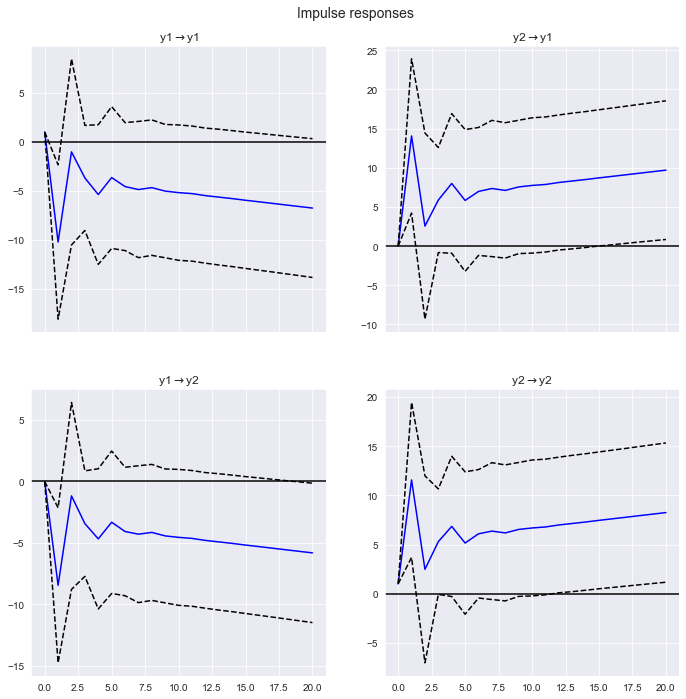

In [98]:
num_periods = 20
ir = res_vecm.irf(periods=num_periods)
ir.plot()
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: 2.5px solid black;">


## Application <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p6'></a>

<br>

<p style="text-align:justify;">  
Les crises financière récentes ont été caractérisé entre autre par une vitesse de propagation très importante. Une des raisons permettant d'expliquer cette facilité qu'un choc peut avoir à se propager, est l'intégration des marchés financiers. Dans cette lignée, un certain nombre d'études ont réalisé une analyse de l'intégration des marchés financiers européens et américains pour tenter de comprendre les raisons de l'expension de la crise de 2007 <a href="https://www.cairn.info/revue-economie-et-prevision-2009-1-page-105.htm?contenu=article"> V. Borgny, V. Mignon (2009).</a>. </p> 

<p style="text-align:justify;">  
Une manière de s'intéresser à ce sujet est d'étudier la dynamique commune potentielle des prix d'actifs de différents marchés. Une telle analyse peut être réalisée au travers d'un VAR ou d'un VECM. C'est ce que l'on propose dans cette application pour le marché boursier américain. 
</p>

Pour ce faire, nous allons étudier la relation entre les cours du prix des actifs du CAC40 et du S\&P 500.


<b>Application</b>

1) Importer les données 


</span>

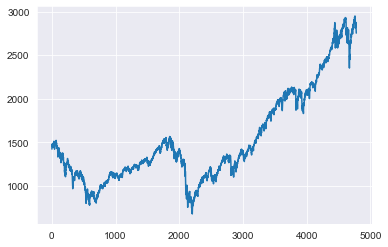

In [99]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

url_base = "https://query1.finance.yahoo.com"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00
symbol = "^GSPC"
period1 = int(dt.datetime(2000,6,1).timestamp())
period2 = int(dt.datetime(2019,6,1).timestamp())
interval = "1d"

url_suite = "/v7/finance/download/%s?period1=%s&period2=%s&interval=%s" % (symbol, period1, period2, interval)

full_url = url_base + url_suite

resp = rq.get(full_url, headers=headers).text

str_io = StringIO(resp)

data_sp = pd.read_csv(str_io, sep=",")

plt.plot(data_sp["Close"])
plt.show()

959810400 1559340000
https://query1.finance.yahoo.com/v7/finance/download/^FCHI?period1=959810400&period2=1559340000&interval=1d


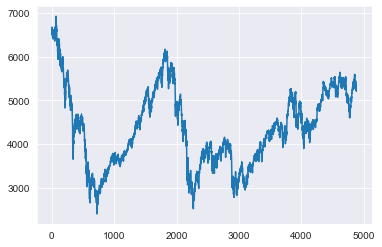

In [101]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

url_base = "https://query1.finance.yahoo.com"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00
symbol = "^FCHI"
period1 = int(dt.datetime(2000,6,1).timestamp())
period2 = int(dt.datetime(2019,6,1).timestamp())
print(period1, period2)
interval = "1d"

url_suite = "/v7/finance/download/%s?period1=%s&period2=%s&interval=%s" % (symbol, period1, period2, interval)

full_url = url_base + url_suite
print(full_url)

resp = rq.get(full_url, headers=headers).text

str_io = StringIO(resp)

data_cac = pd.read_csv(str_io, sep=",")

plt.plot(data_cac["Close"])

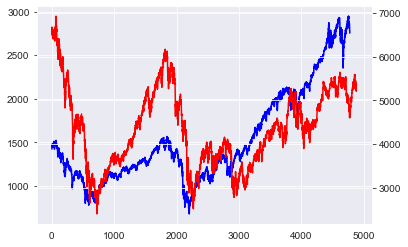

In [102]:
# graphique des deux séries simultannément

fig, ax1 = plt.subplots()

ax1.plot(data_sp.Close, color='blue')
# ax1.set_ylabel('No disaster',fontsize=20, color='b')


axs2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# axs2.set_ylabel('Disaster',fontsize=20, color='r')  # we already handled the x-label with ax1
axs2.plot(data_cac.Close, color='r')

plt.show()

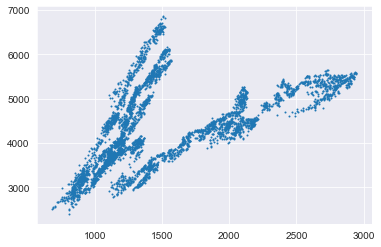

In [106]:
# on fusionne les deux séries sous un même dataframe

df1 = pd.DataFrame(data = data_sp[["Date","Close"]].values, columns=["date", "close_sp"])
df2 = pd.DataFrame(data = data_cac[["Date","Close"]].values, columns=["date", "close_cac"])

# ligne pour ne garder que les dates communes aux deux séries 
df  = pd.merge(left=df1, left_on='date',
         right=df2, right_on='date').dropna()


plt.scatter(df.close_sp,df.close_cac,s=1)
plt.show()

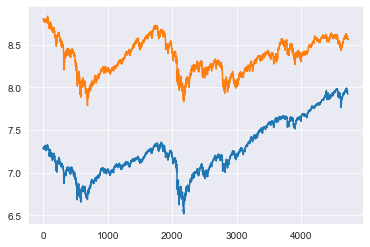

In [110]:
# passage des variables en log (pour écraser les différences d'échelles)
X = [np.log(i) for i in df.close_sp]
y = [np.log(i) for i in df.close_cac]

sns.set_style("darkgrid")
plt.plot(X)
plt.plot(y)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

2) Tests de stationnarité
    
- Nous ne revenons pas sur ces tests : ils commencent à être connus.
- Il faut simplement vérifier que les séries ne sont ic pas stationnaires
    
<br>
    
3) Test de cointégration
    

a - Estimation de la relation de long terme
</span>

In [113]:
mod = sm.OLS(y, sm.add_constant(X))
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     2846.
Date:                Wed, 24 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:10:28   Log-Likelihood:                 1893.7
No. Observations:                4726   AIC:                            -3783.
Df Residuals:                    4724   BIC:                            -3770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5857      0.052    107.271      0.0

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

b - Récupération et étude des résidus

c - Test de racine unitaire sur les résidus (à comparer avec les valeurs tabulées de McKinnon). Voir aussi la fonction <a href="https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.coint.html">coint</a> de statsmodels.


</span>

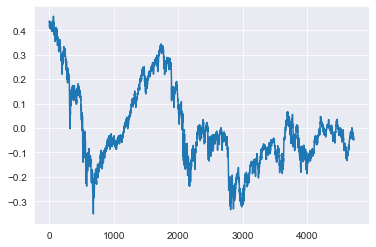

(-2.715651526610708, 0.0064343359423749994, {'1%': -2.566214351908183, '5%': -1.941057118192, '10%': -1.616763790979605}, <statsmodels.stats.diagnostic.ResultsStore object at 0x000001ECC11335E0>)


In [117]:
Z = result.resid 

plt.plot(Z)
plt.show()


adf = adfuller(Z, regression='nc', autolag='AIC', regresults=True)
print(adf)

il faut comparer cette donnée -2.715651526610708 au table de Mc Kinnon. on sera tout dans le modèle sans constante avec une variable. On rejette $H_0$, les variables sont cointégration 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

4) Estimation du VECM

a - Détermination du nombre de retards

</span>

In [129]:
# selection du bon nombre de lag
    # on réuni l'ensemble des variables au sien d'un même array
var = np.transpose(np.array([X,y]))

    # estimation de n modèles
lag_order = select_order(data=var, maxlags=20, deterministic="nc")
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,-17.76,-17.75,1.938e-08,-17.76
1,-17.96,-17.95,1.578e-08,-17.96
2,-17.99,-17.97,1.544e-08,-17.98
3,-17.99,-17.97*,1.535e-08,-17.98
4,-17.99,-17.96,1.536e-08,-17.98
5,-18.00,-17.96,1.525e-08,-17.99*
6,-18.00,-17.96,1.524e-08,-17.98
7,-18.00,-17.95,1.522e-08,-17.98
8,-18.00,-17.95,1.523e-08,-17.98
9,-18.00,-17.94,1.524e-08,-17.98


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

b - Détermination du rang de cointégration

</span>

In [132]:
# s'arrurer de l'ordre d'intégration 
rank_test = select_coint_rank(var, det_order=-1,  k_ar_diff=1, signif=0.05)
rank_test.rank

0

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

c - Estimation du modèle 

</span>

In [136]:
# la fonction vecm du packages statsmodels reestime directement la relation de long terme
model_vecm = VECM(var, exog=None, coint_rank=1, k_ar_diff=5, deterministic='nc')
res_vecm = model_vecm.fit()
res_vecm.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.y1,-0.0875,0.019,-4.607,0.000,-0.125,-0.050
L1.y2,0.0042,0.017,0.254,0.799,-0.028,0.037
L2.y1,-0.0713,0.021,-3.353,0.001,-0.113,-0.030
L2.y2,0.0232,0.017,1.330,0.184,-0.011,0.057
L3.y1,0.0080,0.021,0.372,0.710,-0.034,0.050
L3.y2,-0.0016,0.018,-0.093,0.926,-0.036,0.033
L4.y1,-0.0466,0.021,-2.189,0.029,-0.088,-0.005
L4.y2,0.0379,0.017,2.183,0.029,0.004,0.072
L5.y1,-0.0418,0.020,-2.086,0.037,-0.081,-0.003
L5.y2,-0.0184,0.016,-1.182,0.237,-0.049,0.012


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

d - Fonctions de réponse impulsionnelles

</span>

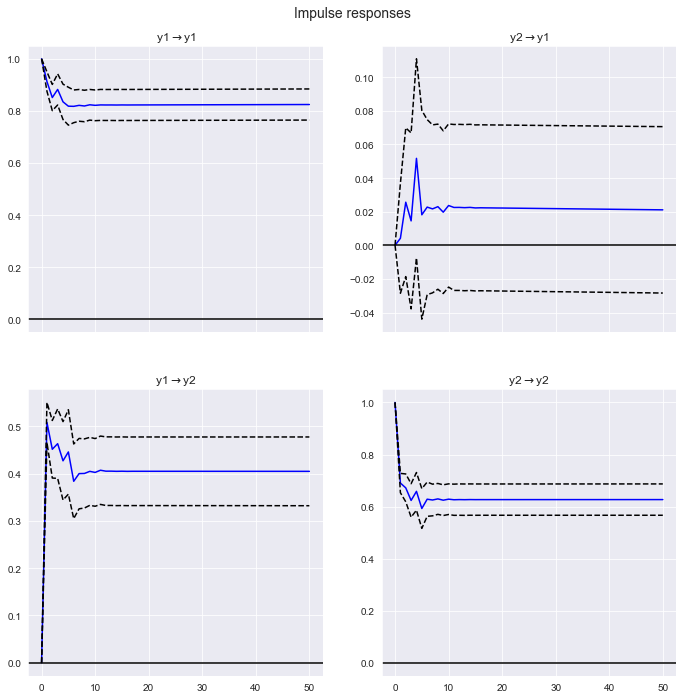

In [121]:
# la fonction vecm du packages statsmodels reestime directement la relation de long terme
    # on rappelle que var = [rdt_sp,rdt_cac]

num_periods = 50
ir = res_vecm.irf(periods=num_periods)
ir.plot()
plt.show()

un choc de 1 sur 1 n'a pas l'air de se resorber sur 50 période

y2 sur y1 pas significatif car 0 dans l'intervalle cac40 n'influence pas le sp500

y1 sur y2 significatif un choc positif fait un choc positif le cac40 influence le sp500

